## Properties of the cratons

Requirement is to obtain some geophysical data about the cratonic lithosphere and compare to the same property for some other geological setting.

We can use the crust 1.0 geological regionalisation to query certain parts of the litho1.0 dataset and determine how lithospheric properties relate to the geological setting.

To do so, we need to be able to:

   - Construct a uniform discretisation of the globe for sampling
   - Obtain crustal type at those points
   - Select the points that meet certain criteria in the Crust 1.0 model
   - Extract properties from Litho1.0 for those points
   - Analyse
   - Plot
   
Stripy can produce the relevant sample points (we could, perhaps, use the original sample points for the litho1.0 model, or well- distributed points from a face-included icosahedron). Litho1.0 and Crust1.0 have the interpolation tools we need.




In [1]:
import litho1pt0 as litho1pt0
import stripy
import numpy as np

In [2]:
even_mesh = stripy.spherical_meshes.icosahedral_mesh(include_face_points=True, refinement_levels=5)

In [3]:
number_of_mesh_points = even_mesh.npoints
print (number_of_mesh_points)
print (even_mesh.lats.shape)

30722
(30722,)


In [4]:
latitudes_in_radians = even_mesh.lats
latitudes_in_degrees = np.degrees(latitudes_in_radians)

longitudes_in_radians = even_mesh.lons 
longitudes_in_degrees = np.degrees(longitudes_in_radians)%360.0 - 180.0

In [5]:
## Plot these points to check the mesh is reasonable

print (latitudes_in_degrees.min(), latitudes_in_degrees.max())
print (longitudes_in_degrees.min(), longitudes_in_degrees.max())


-90.0 90.0
-180.0 180.0


In [6]:
## Other version of this

# Make an empty array with the same size as the number of mesh points
crustype2 = np.empty(number_of_mesh_points)
crustype2 = np.empty_like(even_mesh.lats)

# Loop and fill the array with crust regionalisation values
for i in range(0,even_mesh.npoints):
    if i%1000 == 0:
        print("Iteration: {}".format(i))
    crustype2[i] = litho1pt0.crust_type_at(lat=latitudes_in_degrees[i], lon=longitudes_in_degrees[i])
    
    

Iteration: 0
Iteration: 1000
Iteration: 2000
Iteration: 3000
Iteration: 4000
Iteration: 5000
Iteration: 6000
Iteration: 7000
Iteration: 8000
Iteration: 9000
Iteration: 10000
Iteration: 11000
Iteration: 12000
Iteration: 13000
Iteration: 14000
Iteration: 15000
Iteration: 16000
Iteration: 17000
Iteration: 18000
Iteration: 19000
Iteration: 20000
Iteration: 21000
Iteration: 22000
Iteration: 23000
Iteration: 24000
Iteration: 25000
Iteration: 26000
Iteration: 27000
Iteration: 28000
Iteration: 29000
Iteration: 30000


In [7]:
## Now need depth values from litho1pt0 geophysical model 

litho1pt0.l1_layer_decode

OrderedDict([('ASTHENO-TOP', 0),
             ('LID-BOTTOM', 1),
             ('LID-TOP', 2),
             ('CRUST3-BOTTOM', 3),
             ('CRUST3-TOP', 4),
             ('CRUST2-BOTTOM', 5),
             ('CRUST2-TOP', 6),
             ('CRUST1-BOTTOM', 7),
             ('CRUST1-TOP', 8),
             ('SEDS3-BOTTOM', 9),
             ('SEDS3-TOP', 10),
             ('SEDS2-BOTTOM', 11),
             ('SEDS2-TOP', 12),
             ('SEDS1-BOTTOM', 13),
             ('SEDS1-TOP', 14),
             ('WATER-BOTTOM', 15),
             ('WATER-TOP', 16),
             ('ICE-BOTTOM', 17),
             ('ICE-TOP', 18)])

In [8]:
l1 = litho1pt0.layer_depth(latitudes_in_degrees, longitudes_in_degrees, "LID-BOTTOM") *0.001
l2 = litho1pt0.layer_depth(latitudes_in_degrees, longitudes_in_degrees, "LID-TOP") *0.001

lthickness = (l1 - l2)

print("Litho thickness - {}, {}".format(lthickness.min(), lthickness.max()))

Litho thickness - 0.18207070637822653, 270.38195360489243


In [9]:
c1 = litho1pt0.layer_depth(latitudes_in_degrees, longitudes_in_degrees, "CRUST3-BOTTOM") *0.001
c2 = litho1pt0.layer_depth(latitudes_in_degrees, longitudes_in_degrees, "CRUST1-TOP") *0.001

s0 = litho1pt0.layer_depth(latitudes_in_degrees, longitudes_in_degrees, "SEDS1-TOP") *0.001

cthickness = (c1 - c2)
sthickness = (c2 - s0)

print("Crust thickness - {}, {}".format(cthickness.min(), cthickness.max()))

Crust thickness - 0.6228762225032654, 80.13736217341496


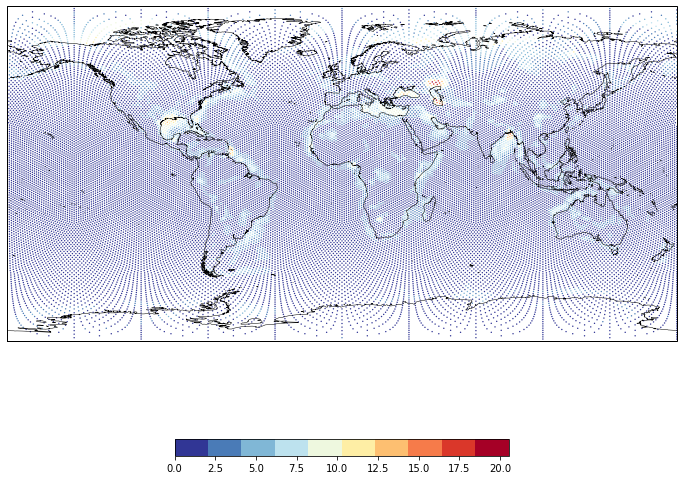

In [10]:
## Is that sensible ?

%matplotlib inline

import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

global_extent     = [-180.0, 180.0, -89, 89]

projection0 = ccrs.PlateCarree()
projection1 = ccrs.Orthographic(central_longitude=140.0, central_latitude=0.0, globe=None)
projection2 = ccrs.Mollweide()
projection3 = ccrs.Robinson()
base_projection = ccrs.PlateCarree()

fig = plt.figure(figsize=(12, 12), facecolor="none")
ax  = plt.subplot(111, projection=projection0)
ax.set_global()

colormap = plt.cm.get_cmap('RdYlBu_r', 10)

m = ax.scatter(longitudes_in_degrees, latitudes_in_degrees, c=sthickness, cmap=colormap,
               s=2.0, linewidth=0.0, transform=ccrs.Geodetic())

plt.colorbar(mappable=m, orientation="horizontal", shrink=0.5)

#ax.add_feature(cartopy.feature.OCEAN, alpha=0.5, zorder=99, facecolor="#BBBBBB")
ax.coastlines(resolution="50m", zorder=100, linewidth=0.5)


In [11]:
crustype = litho1pt0.crust_type_at(lat=np.degrees(even_mesh.lats), lon=np.degrees(even_mesh.lons))

In [12]:
# litho1pt0.c1_region_descriptor in 2,3,4 are Archean terranes - this is an easy way to get those values

craton_cthickness = cthickness[np.logical_and(crustype<=4, crustype>=2)]
craton_lthickness = lthickness[np.logical_and(crustype<=4, crustype>=2)]

# litho1pt0.c1_region_descriptor in 5,6,7,8 are Proterozoic terranes - this is an easy way to get those values

proton_cthickness = cthickness[np.logical_and(crustype<=8, crustype>=5)]
proton_lthickness = lthickness[np.logical_and(crustype<=8, crustype>=5)]

In [13]:
print(craton_lthickness.mean())
print(proton_lthickness.mean())

153.76541476756958
129.34765673710018


In [14]:
for i, crustName in enumerate(litho1pt0.c1_region_descriptor):
    if "Archean" in crustName:
        print(i,"-",crustName)

2 - Archean (Antarctica)
3 - Early Archean
4 - Late Archean
